In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 10% KDD99

In [18]:
filename = "C:/Users/Bin/Documents/Datasets/KDD99/kddcup.data_10_percent_corrected"

In [3]:
normal = 0
anomaly = 0
n_ = []
a_ = []
for chunk in pd.read_csv(filename, chunksize=10000):
    n_.append(normal)
    a_.append(anomaly)
    for index,row in chunk.iterrows():
        if row[-1] == "normal.":
            normal +=1
        else: 
            anomaly += 1

In [4]:

a_ = []
for chunk in pd.read_csv(filename, chunksize=10000):

    for index,row in chunk.iterrows():
        if row[-1] != "normal.":
           a_.append(row[-1])

Text(0,0.5,'Count')

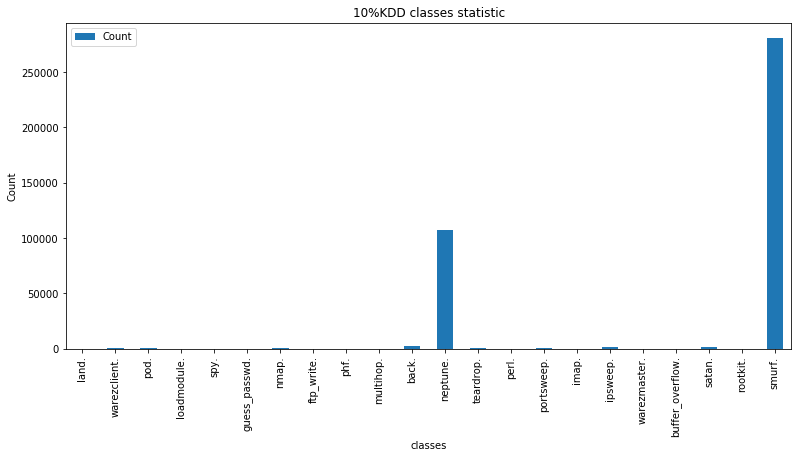

In [11]:
label = set(a_)
v = []
for elem in set(a_):
    v.append(a_.count(elem))
foo = pd.DataFrame(v,index=label,columns=["Count"])
foo.plot.bar(figsize=(13,6))
plt.xticks(range(foo.index.size), label, rotation='vertical')
plt.title("10%KDD classes statistic")
plt.xlabel("classes")
plt.ylabel("Count")

In [12]:
foo

,Count
land.,21
warezclient.,1020
pod.,264
loadmodule.,9
spy.,2
guess_passwd.,53
nmap.,231
ftp_write.,8
phf.,4
multihop.,7


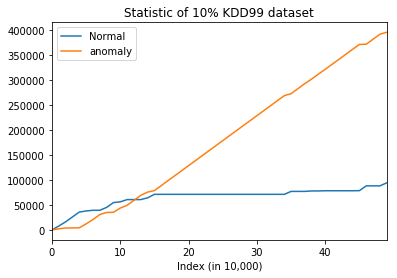

In [31]:
import matplotlib.pyplot as plt
pd.Series(n).plot(label="Normal")
pd.Series(a).plot(label="anomaly")
plt.title("Statistic of 10% KDD99 dataset")
plt.xlabel("Index (in 10,000)")
plt.legend()
plt.show()

In [9]:
n_d = np.array([n_[i]-n_[i-1] for i in range(1,len(n_))])


In [6]:
for i in range(n_d.size):
    if n_d[i] != 0:
        n_d[i] = 1

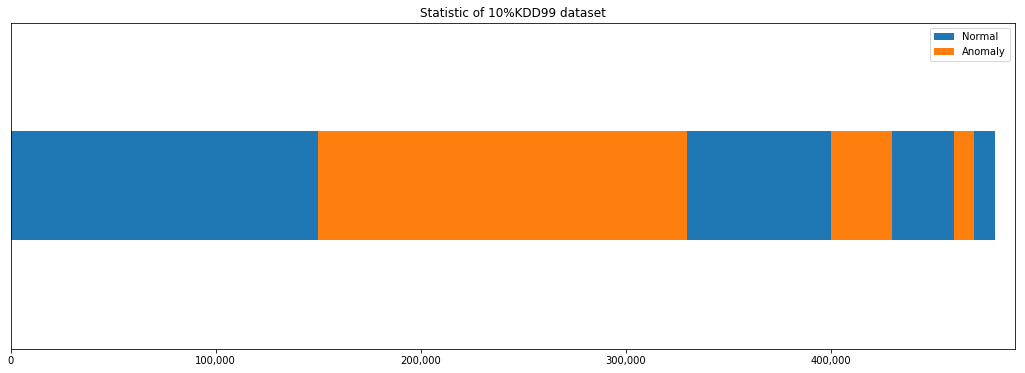

In [7]:
fig, ax = plt.subplots(1,1) 
fig.set_size_inches(18,6)
plt.xlim(0,n_d.size)
x_ticks_labels = ["0","100,000","200,000","300,000","400,000","500,000"]
ax.set_xticklabels(x_ticks_labels, fontsize=10)
ax.set_ylim(1,4)
ax.fill_between(x=range(n_d.size),y1=np.ones(n_d.size)*2,y2=np.ones(n_d.size)*3,label="Normal")
n_d_c = np.where(n_d==0,1,-1)
n_d_c = np.where(n_d_c==-1,0,1)
ax.get_yaxis().set_visible(False)
ax.fill_between(x=range(n_d_c.size),y1=np.ones(n_d_c.size)*2,y2=np.ones(n_d_c.size)*3,
              where=n_d_c,label="Anomaly")
plt.title("Statistic of 10%KDD99 dataset")
ax.legend()

# KDD99

In [13]:
filename = "C:/Users/Bin/Documents/Datasets/KDD99/kddcup.data.corrected"

In [15]:
normal = 0
anomaly = 0
n_ = []
a_ = []

for chunk in pd.read_csv(filename, chunksize=10000):

    n_.append(normal)
    a_.append(anomaly)
    #print(normal,anomaly)
    for index,row in chunk.iterrows():
        if row[-1] == "normal.":
            normal +=1
        else: 
            anomaly += 1

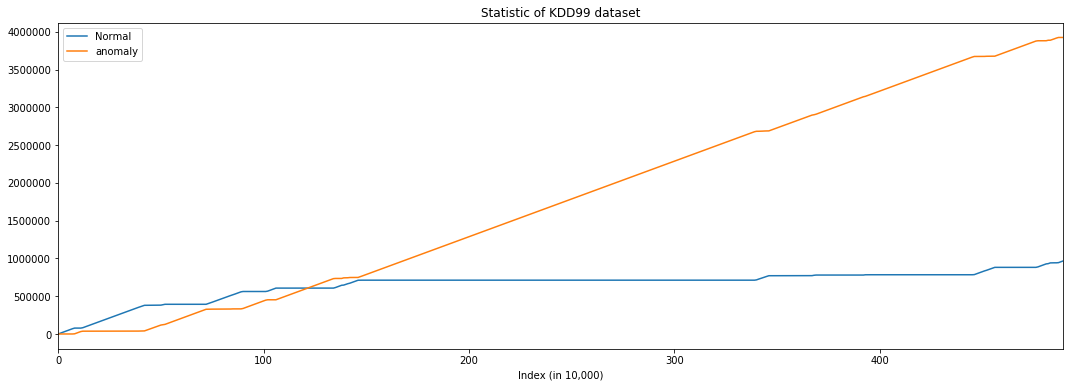

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
pd.Series(n_).plot(label="Normal")
pd.Series(a_).plot(label="anomaly")
plt.title("Statistic of KDD99 dataset")
plt.xlabel("Index (in 10,000)")
plt.legend()
plt.show()

In [49]:
n_d = np.array([n_[i]-n_[i-1] for i in range(1,len(n_))])


In [51]:
for i in range(n_d.size):
    if n_d[i] != 0:
        n_d[i] = 1

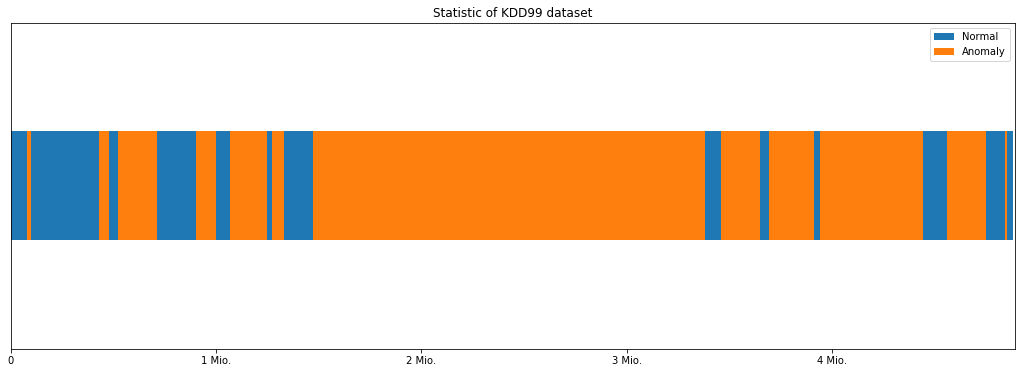

In [125]:
fig, ax = plt.subplots(1,1) 
fig.set_size_inches(18,6)
plt.xlim(0,n_d.size)
x_ticks_labels = ["0","1 Mio.","2 Mio.","3 Mio.","4 Mio.","5 Mio."]
ax.set_xticklabels(x_ticks_labels, fontsize=10)
ax.set_ylim(1,4)
ax.fill_between(x=range(n_d.size),y1=np.ones(n_d.size)*2,y2=np.ones(n_d.size)*3,label="Normal")
n_d_c = np.where(n_d==0,1,-1)
n_d_c = np.where(n_d_c==-1,0,1)
ax.get_yaxis().set_visible(False)
ax.fill_between(x=range(n_d_c.size),y1=np.ones(n_d_c.size)*2,y2=np.ones(n_d_c.size)*3,
              where=n_d_c,label="Anomaly")
plt.title("Statistic of KDD99 dataset")
ax.legend()